In [15]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Unpacking the cifar-10 dataset

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
#List of train data files:
data_batches = ['data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5',]
#Unpickling every batch in the list:
train_data_dicts = [unpickle(batch) for batch in data_batches]
#Unpickling test data file:
test_data_dict = unpickle('test_batch')
#Unpickling label names file:
label_names_dicts = unpickle('batches.meta')
label_names = [str(label, 'utf-8') for label in label_names_dicts[b'label_names']]

In [4]:
#Group batches and define train data:
x_train = np.empty(shape=(0,3072),dtype=np.uint8)
y_train = []
for dict in train_data_dicts:
    x_train = np.append(x_train, dict[b'data'], axis = 0)
    y_train += dict[b'labels']
y_train = np.asarray(y_train)

#Define test data:
x_test = np.array(test_data_dict[b'data'])
y_test = np.array(test_data_dict[b'labels'])

#Convert x to image format:
x_train = x_train.reshape(50000,3,32,32).transpose(0,2,3,1)
x_test = x_test.reshape(10000,3,32,32).transpose(0,2,3,1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


We now have the train and test data. Let's try plotting some of the images

In [13]:
#function to plot 6 random images:
def plot_6(x=x_test,y=y_test,y_hat=None):
    fig, ax = plt.subplots(2,3)
    i_list = np.random.randint(low=0, high=10000, size = 6) #generate list of random indices
    i=0
    for row in ax:
        for col in row:
            col.axis('off')
            #get image:
            img = x[i_list[i]]
            col.imshow(img)
            #get label:
            label_no = y[i_list[i]]
            label = label_names[label_no]
    
            if y_hat: #print predictions if they have been made
                predicted_label_no = y_hat[i_list[i]]
                predicted_label = label_names[predicted_label_no]
                col.set_title(f'Index: {i_list[i]}\nLabel: {label}\nPredicted: {predicted_label}',
                              loc='left', fontdict={'fontsize': 8})
                fig.suptitle('Example Predictions')
            else: 
                col.set_title(f'Index: {i_list[i]}\nLabel: {label}',
                              loc='left', fontdict={'fontsize': 8})
                fig.suptitle('Example Images')
            
            #update to the next generated index
            i+=1
    plt.show()

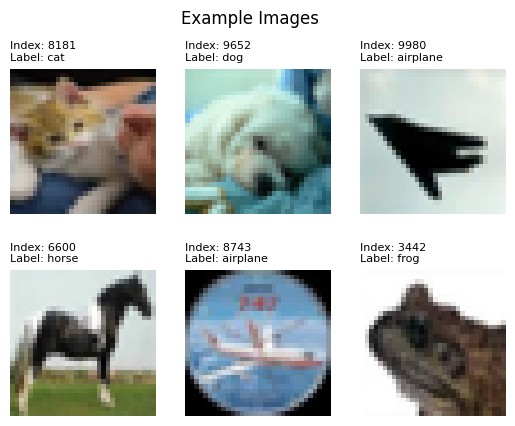

In [14]:
plot_6()